In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/ToothNumber_TaskDataset.zip -d /content/dataset


Archive:  /content/drive/MyDrive/ToothNumber_TaskDataset.zip
   creating: /content/dataset/images/
   creating: /content/dataset/labels/
  inflating: /content/dataset/images/cate8-00059_jpg.rf.d0bd3cb39cc429692abe9c8cf6f9c75e.jpg  
  inflating: /content/dataset/images/b879ef2c-20250503-101257822.jpg  
  inflating: /content/dataset/images/cate1-00008_jpg.rf.10436fa8d35c0764df5402f3a6f093dc.jpg  
  inflating: /content/dataset/images/1c50bda9-20241231-145320490.jpg  
  inflating: /content/dataset/images/cate8-00131_jpg.rf.9755ad7a2010d677500a57fe7291285f.jpg  
  inflating: /content/dataset/images/b9b8b22f-20240730-123647335.jpg  
  inflating: /content/dataset/images/cate2-00127_jpg.rf.aaba4e5e69cf5a828885a05115aa8d11.jpg  
  inflating: /content/dataset/images/cate8-00191_jpg.rf.856a6afd259fc24434201fdf1c9b37a0.jpg  
  inflating: /content/dataset/images/cate1-00014_jpg.rf.35b346d991cc15ccd3041ca12411ceeb.jpg  
  inflating: /content/dataset/images/d1f49454-20240729-105642516.jpg  
  inflati

In [4]:
import os

root = "/content/dataset"
print("Found at /content/dataset:", os.listdir(root))
print("images count:", len([f for f in os.listdir(f"{root}/images") if f.lower().endswith(('.jpg','.jpeg','.png'))]))
print("labels  count:", len([f for f in os.listdir(f"{root}/labels") if f.lower().endswith('.txt')]))


Found at /content/dataset: ['images', 'labels']
images count: 497
labels  count: 497


In [5]:
# Split into Train(80%)/Val(10%)/Test(10%)
import os, shutil, random

src_images = "/content/dataset/images"
src_labels = "/content/dataset/labels"
out_root   = "/content/dataset_split"
os.makedirs(out_root, exist_ok=True)

# Create split folders
for sp in ["train", "val", "test"]:
    os.makedirs(f"{out_root}/{sp}/images", exist_ok=True)
    os.makedirs(f"{out_root}/{sp}/labels", exist_ok=True)

# Collect image filenames (handle jpg/jpeg/png)
img_files = [f for f in os.listdir(src_images) if f.lower().endswith(('.jpg','.jpeg','.png'))]
random.seed(42)
random.shuffle(img_files)

n = len(img_files)
n_train = int(0.8 * n)
n_val   = int(0.1 * n)
splits = {
    "train": img_files[:n_train],
    "val":   img_files[n_train:n_train+n_val],
    "test":  img_files[n_train+n_val:]
}

def copy_one(img_name, split):
    name_no_ext = os.path.splitext(img_name)[0]
    lbl_name = name_no_ext + ".txt"
    src_img = os.path.join(src_images, img_name)
    src_lbl = os.path.join(src_labels, lbl_name)
    dst_img = os.path.join(out_root, split, "images", img_name)
    dst_lbl = os.path.join(out_root, split, "labels", lbl_name)
    shutil.copy2(src_img, dst_img)
    if os.path.exists(src_lbl):
        shutil.copy2(src_lbl, dst_lbl)
    else:
        # If any image is missing a label, you can choose to remove the copied image:
        # os.remove(dst_img)
        pass

for sp, files in splits.items():
    for f in files:
        copy_one(f, sp)

print("✅ Split complete.")
for sp in ["train", "val", "test"]:
    nimg = len([f for f in os.listdir(f"{out_root}/{sp}/images") if f.lower().endswith(('.jpg','.jpeg','.png'))])
    nlbl = len([f for f in os.listdir(f"{out_root}/{sp}/labels") if f.lower().endswith('.txt')])
    print(f"{sp}: {nimg} images, {nlbl} labels")


✅ Split complete.
train: 397 images, 397 labels
val: 49 images, 49 labels
test: 51 images, 51 labels


In [6]:
# Create data.yaml (FDI classes in given order — do not change)
yaml_text = """
train: /content/dataset_split/train/images
val: /content/dataset_split/val/images
test: /content/dataset_split/test/images

names:
  0: Canine (13)
  1: Canine (23)
  2: Canine (33)
  3: Canine (43)
  4: Central Incisor (21)
  5: Central Incisor (41)
  6: Central Incisor (31)
  7: Central Incisor (11)
  8: First Molar (16)
  9: First Molar (26)
  10: First Molar (36)
  11: First Molar (46)
  12: First Premolar (14)
  13: First Premolar (34)
  14: First Premolar (44)
  15: First Premolar (24)
  16: Lateral Incisor (22)
  17: Lateral Incisor (32)
  18: Lateral Incisor (42)
  19: Lateral Incisor (12)
  20: Second Molar (17)
  21: Second Molar (27)
  22: Second Molar (37)
  23: Second Molar (47)
  24: Second Premolar (15)
  25: Second Premolar (25)
  26: Second Premolar (35)
  27: Second Premolar (45)
  28: Third Molar (18)
  29: Third Molar (28)
  30: Third Molar (38)
  31: Third Molar (48)
"""
with open("/content/dataset_split/data.yaml", "w") as f:
    f.write(yaml_text)
print("✅ data.yaml saved at /content/dataset_split/data.yaml")


✅ data.yaml saved at /content/dataset_split/data.yaml


In [7]:
# 1. Force compatible numpy + reinstall ultralytics
!pip install numpy==1.23.5 --force-reinstall
!pip install ultralytics --upgrade --no-cache-dir


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 74.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.9 MB/s eta 0:00:00


In [8]:
# --- Reset environment ---
!pip uninstall -y torch torchvision torchaudio ultralytics numpy

# --- Install compatible stack ---
!pip install numpy==1.23.5
!pip install torch==2.2.0+cu118 torchvision==0.17.0+cu118 torchaudio==2.2.0+cu118 \
  --extra-index-url https://download.pytorch.org/whl/cu118

!pip install ultralytics==8.3.0


Found existing installation: torch 2.8.0+cu126
Uninstalling torch-2.8.0+cu126:
  Successfully uninstalled torch-2.8.0+cu126
Found existing installation: torchvision 0.23.0+cu126
Uninstalling torchvision-0.23.0+cu126:
  Successfully uninstalled torchvision-0.23.0+cu126
Found existing installation: torchaudio 2.8.0+cu126
Uninstalling torchaudio-2.8.0+cu126:
  Successfully uninstalled torchaudio-2.8.0+cu126
Found existing installation: ultralytics 8.3.189
Uninstalling ultralytics-8.3.189:
  Successfully uninstalled ultralytics-8.3.189
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to bu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requ

In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())
print("GPU:", torch.cuda.get_device_name(0))

from ultralytics import YOLO

model = YOLO("yolov8s.pt")

results = model.train(
    data="/content/dataset_split/data.yaml",
    imgsz=640,
    epochs=100,
    batch=16,
    device=0,   # T4 GPU
    workers=2,
    project="runs",   # ✅ simple name, not a path
    name="detect_fdi",
    exist_ok=True,
    patience=20,
    verbose=True,
    plots=True
)


CUDA available: True
Device count: 1
GPU: Tesla T4
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 186MB/s]


New https://pypi.org/project/ultralytics/8.3.189 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.12.11 torch-2.2.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dataset_split/data.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=2, project=runs, name=detect_fdi, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

100%|██████████| 755k/755k [00:00<00:00, 39.6MB/s]


Overriding model.yaml nc=80 with nc=32

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: banerjeearpita1920 (banerjeearpita1920-na) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 130MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset_split/train/labels... 397 images, 0 backgrounds, 0 corrupt: 100%|██████████| 397/397 [00:00<00:00, 450.93it/s]

train: New cache created: /content/dataset_split/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 67, len(boxes) = 11089. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/dataset_split/val/labels... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<00:00, 404.47it/s]

val: New cache created: /content/dataset_split/val/labels.cache


Plotting labels to runs/detect_fdi/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000278, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect_fdi
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.45G      2.122       5.07      1.736        630        640: 100%|██████████| 25/25 [00:13<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         49       1322          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.91G      1.386      4.607      1.169        444        640: 100%|██████████| 25/25 [00:08<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all         49       1322    0.00521   0.000679    0.00279     0.0014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.14G      1.348      4.211      1.123        544        640: 100%|██████████| 25/25 [00:08<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         49       1322     0.0846      0.248     0.0698     0.0433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.13G       1.36      3.784      1.121        657        640: 100%|██████████| 25/25 [00:09<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         49       1322     0.0832      0.656      0.134     0.0808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.48G      1.347      3.335      1.114        520        640: 100%|██████████| 25/25 [00:09<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         49       1322     0.0853      0.793      0.189      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       4.6G      1.376      2.893      1.142        645        640: 100%|██████████| 25/25 [00:07<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         49       1322      0.207      0.495      0.245      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.49G       1.35      2.562      1.138        613        640: 100%|██████████| 25/25 [00:08<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         49       1322      0.238      0.558      0.278       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.24G      1.331      2.321      1.141        579        640: 100%|██████████| 25/25 [00:09<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         49       1322      0.279      0.566      0.332      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.74G      1.282       2.16       1.12        423        640: 100%|██████████| 25/25 [00:08<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         49       1322       0.28      0.624       0.36      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.76G      1.294      2.033      1.135        449        640: 100%|██████████| 25/25 [00:08<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         49       1322       0.26      0.649      0.322      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.95G       1.28      1.923      1.134        335        640: 100%|██████████| 25/25 [00:09<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         49       1322      0.326      0.676      0.403      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.22G      1.222      1.838      1.114        547        640: 100%|██████████| 25/25 [00:08<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         49       1322      0.356      0.717      0.439      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.91G      1.252      1.796       1.14        514        640: 100%|██████████| 25/25 [00:07<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         49       1322      0.338      0.755      0.394      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       4.7G      1.232      1.737      1.133        520        640: 100%|██████████| 25/25 [00:08<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         49       1322      0.381       0.76      0.435      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.48G      1.229      1.705      1.125        447        640: 100%|██████████| 25/25 [00:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         49       1322      0.395      0.778      0.476      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.19G      1.216      1.665      1.132        515        640: 100%|██████████| 25/25 [00:08<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         49       1322      0.447      0.773      0.542      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.93G      1.191       1.64      1.112        397        640: 100%|██████████| 25/25 [00:08<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         49       1322      0.437      0.801       0.53      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.58G      1.207      1.605      1.108        626        640: 100%|██████████| 25/25 [00:09<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         49       1322      0.442      0.792      0.525      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.09G      1.184      1.561      1.111        455        640: 100%|██████████| 25/25 [00:08<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         49       1322      0.449      0.819       0.54      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.84G      1.182      1.538      1.114        413        640: 100%|██████████| 25/25 [00:07<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         49       1322       0.45      0.822      0.556      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       4.5G      1.179      1.506      1.114        535        640: 100%|██████████| 25/25 [00:09<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         49       1322      0.451      0.833      0.559       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.93G      1.133      1.495      1.086        532        640: 100%|██████████| 25/25 [00:09<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         49       1322      0.454      0.841      0.545      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.06G      1.138      1.488      1.084        396        640: 100%|██████████| 25/25 [00:07<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         49       1322      0.449      0.831      0.565       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.48G      1.153      1.452      1.094        509        640: 100%|██████████| 25/25 [00:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         49       1322      0.467      0.862       0.59      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.97G      1.153       1.45      1.092        538        640: 100%|██████████| 25/25 [00:09<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         49       1322      0.454      0.864      0.576       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.62G      1.136      1.432      1.085        567        640: 100%|██████████| 25/25 [00:08<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         49       1322      0.465      0.877       0.58      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       4.5G      1.154      1.424      1.101        449        640: 100%|██████████| 25/25 [00:08<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         49       1322      0.461      0.874      0.554      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.78G      1.147      1.413      1.079        387        640: 100%|██████████| 25/25 [00:09<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         49       1322      0.448      0.865      0.531      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.29G      1.099      1.382      1.079        453        640: 100%|██████████| 25/25 [00:08<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         49       1322      0.448       0.88      0.508      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.76G      1.108      1.371      1.076        407        640: 100%|██████████| 25/25 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


                   all         49       1322      0.469      0.872      0.564       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.42G      1.102      1.353      1.073        395        640: 100%|██████████| 25/25 [00:09<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]


                   all         49       1322      0.456      0.864      0.528      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.51G      1.103      1.349      1.077        451        640: 100%|██████████| 25/25 [00:09<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         49       1322      0.461       0.85      0.557      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.66G      1.088      1.338      1.063        538        640: 100%|██████████| 25/25 [00:08<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         49       1322      0.477      0.854      0.618      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.02G      1.093      1.315      1.075        459        640: 100%|██████████| 25/25 [00:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         49       1322       0.49      0.831      0.601      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.18G      1.074      1.314      1.069        684        640: 100%|██████████| 25/25 [00:09<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         49       1322      0.493      0.793        0.6      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.92G       1.06      1.303      1.061        382        640: 100%|██████████| 25/25 [00:08<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         49       1322      0.491      0.844      0.635      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       5.1G      1.083      1.285      1.073        446        640: 100%|██████████| 25/25 [00:08<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         49       1322      0.477      0.827      0.582      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.71G      1.068      1.259      1.055        623        640: 100%|██████████| 25/25 [00:09<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         49       1322       0.46      0.854      0.573      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.61G      1.062      1.233      1.055        471        640: 100%|██████████| 25/25 [00:08<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         49       1322      0.579      0.773      0.677      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.76G      1.068      1.225      1.057        534        640: 100%|██████████| 25/25 [00:07<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         49       1322      0.503      0.817      0.629      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.02G       1.05       1.18       1.05        507        640: 100%|██████████| 25/25 [00:09<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         49       1322      0.489      0.849      0.605      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.49G      1.043      1.166      1.045        562        640: 100%|██████████| 25/25 [00:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         49       1322      0.498      0.775      0.605      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.83G      1.019      1.138      1.045        480        640: 100%|██████████| 25/25 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         49       1322      0.547      0.787       0.67      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.79G       1.01      1.118       1.04        721        640: 100%|██████████| 25/25 [00:08<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         49       1322      0.493      0.802      0.611      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.12G      1.062       1.11      1.045        621        640: 100%|██████████| 25/25 [00:09<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         49       1322      0.629      0.789      0.772      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.75G      1.024      1.078      1.035        485        640: 100%|██████████| 25/25 [00:08<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         49       1322      0.609       0.81      0.749      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       4.8G      1.064      1.095      1.059        523        640: 100%|██████████| 25/25 [00:07<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         49       1322      0.604      0.786      0.721      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.23G      1.007      1.043      1.035        533        640: 100%|██████████| 25/25 [00:09<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         49       1322      0.701      0.834      0.827      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       5.1G      1.034      1.044      1.044        526        640: 100%|██████████| 25/25 [00:08<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         49       1322      0.662      0.795      0.771      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.23G      1.007      1.036      1.038        376        640: 100%|██████████| 25/25 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         49       1322      0.498      0.738      0.597      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.72G      1.029     0.9604      1.037        662        640: 100%|██████████| 25/25 [00:09<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         49       1322      0.616      0.757      0.726      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.86G      1.027     0.9581      1.039        441        640: 100%|██████████| 25/25 [00:09<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         49       1322      0.702      0.783        0.8      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.67G      1.022     0.9528       1.05        572        640: 100%|██████████| 25/25 [00:07<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         49       1322      0.744      0.797      0.837      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.17G      1.014     0.9324      1.036        529        640: 100%|██████████| 25/25 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


                   all         49       1322      0.613      0.721      0.689      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.15G     0.9979     0.9052      1.031        542        640: 100%|██████████| 25/25 [00:09<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         49       1322       0.68      0.734      0.748      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.99G     0.9855     0.9014      1.036        565        640: 100%|██████████| 25/25 [00:08<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         49       1322      0.736      0.846      0.859      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.56G      1.024     0.9066      1.032        546        640: 100%|██████████| 25/25 [00:08<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


                   all         49       1322      0.781      0.845      0.863      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.97G      1.001     0.8946      1.031        562        640: 100%|██████████| 25/25 [00:09<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         49       1322      0.777      0.819      0.851      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.84G     0.9919     0.8705      1.026        570        640: 100%|██████████| 25/25 [00:08<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         49       1322      0.752      0.792      0.832      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.89G     0.9971     0.8541      1.029        582        640: 100%|██████████| 25/25 [00:07<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


                   all         49       1322      0.717      0.802      0.811      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.74G     0.9825     0.8583       1.03        667        640: 100%|██████████| 25/25 [00:09<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         49       1322      0.584      0.714      0.673      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.74G     0.9806     0.8441      1.028        445        640: 100%|██████████| 25/25 [00:08<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         49       1322      0.737      0.816       0.83      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         5G     0.9952      0.858      1.029        663        640: 100%|██████████| 25/25 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         49       1322       0.75      0.802      0.833       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.27G     0.9765     0.8249      1.018        500        640: 100%|██████████| 25/25 [00:09<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]


                   all         49       1322       0.79      0.787      0.839      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.89G      0.976     0.8243      1.027        343        640: 100%|██████████| 25/25 [00:09<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         49       1322      0.742      0.789      0.818      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.81G     0.9595     0.8113      1.015        529        640: 100%|██████████| 25/25 [00:07<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         49       1322      0.647      0.751       0.73       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.47G     0.9744     0.8129       1.02        449        640: 100%|██████████| 25/25 [00:08<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         49       1322      0.756      0.804      0.834      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.93G     0.9872     0.8243      1.026        591        640: 100%|██████████| 25/25 [00:09<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         49       1322      0.745      0.784      0.807       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.61G     0.9652     0.7962      1.016        394        640: 100%|██████████| 25/25 [00:08<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         49       1322       0.77        0.8      0.839      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.37G     0.9597      0.789      1.015        578        640: 100%|██████████| 25/25 [00:08<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]


                   all         49       1322      0.744       0.72      0.784      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.77G     0.9677     0.7877      1.013        482        640: 100%|██████████| 25/25 [00:09<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         49       1322      0.781      0.836      0.867       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.73G     0.9505     0.7812       1.01        526        640: 100%|██████████| 25/25 [00:08<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         49       1322       0.69      0.763      0.769      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.16G     0.9474     0.7778      1.007        688        640: 100%|██████████| 25/25 [00:07<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]


                   all         49       1322      0.797      0.787      0.855      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.85G     0.9632     0.7713      1.019        502        640: 100%|██████████| 25/25 [00:09<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         49       1322      0.738      0.734       0.78      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.91G     0.9499     0.7706      1.015        429        640: 100%|██████████| 25/25 [00:09<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         49       1322      0.808      0.812      0.867      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       4.5G     0.9453     0.7637       1.01        526        640: 100%|██████████| 25/25 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         49       1322      0.772      0.788      0.839      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.75G     0.9546     0.7729      1.013        532        640: 100%|██████████| 25/25 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         49       1322      0.792      0.816      0.858      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.78G     0.9104     0.7376     0.9982        697        640: 100%|██████████| 25/25 [00:09<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         49       1322      0.783      0.816      0.853      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.96G     0.9479     0.7558      1.003        596        640: 100%|██████████| 25/25 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         49       1322      0.782      0.797      0.851      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.41G     0.9092     0.7403      1.005        492        640: 100%|██████████| 25/25 [00:08<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]


                   all         49       1322      0.754      0.782      0.809       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.57G     0.9461     0.7439      1.003        611        640: 100%|██████████| 25/25 [00:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         49       1322      0.779      0.793      0.837      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.99G     0.9305     0.7325      1.004        517        640: 100%|██████████| 25/25 [00:07<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         49       1322      0.808      0.839      0.886      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.75G     0.9278     0.7352      1.006        549        640: 100%|██████████| 25/25 [00:08<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         49       1322      0.808      0.836      0.889      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.91G     0.9043     0.7104     0.9999        431        640: 100%|██████████| 25/25 [00:09<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]


                   all         49       1322      0.804      0.824      0.874      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.77G     0.9203     0.7312      1.005        703        640: 100%|██████████| 25/25 [00:08<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         49       1322      0.832      0.813      0.877      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.24G     0.9252     0.7299      1.005        542        640: 100%|██████████| 25/25 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         49       1322      0.781      0.792      0.837      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       5.2G     0.9267     0.7244      1.004        502        640: 100%|██████████| 25/25 [00:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         49       1322      0.801       0.81      0.853      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.24G     0.9031     0.7153     0.9916        488        640: 100%|██████████| 25/25 [00:08<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         49       1322      0.771      0.788      0.829      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.05G     0.9356      0.711      1.001        556        640: 100%|██████████| 25/25 [00:07<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]


                   all         49       1322      0.768      0.829      0.858      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       5.1G     0.8932     0.7132     0.9916        532        640: 100%|██████████| 25/25 [00:10<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         49       1322       0.79        0.8      0.849      0.556


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.32G     0.8869     0.6702      1.019        346        640: 100%|██████████| 25/25 [00:12<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         49       1322      0.746      0.787      0.817       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.31G     0.8809     0.6481      1.012        376        640: 100%|██████████| 25/25 [00:09<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         49       1322      0.799      0.808       0.87      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.29G     0.8774     0.6414      1.006        398        640: 100%|██████████| 25/25 [00:07<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         49       1322      0.815      0.813      0.875      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.32G      0.868     0.6258      1.001        328        640: 100%|██████████| 25/25 [00:08<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]


                   all         49       1322      0.798      0.812      0.863      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.35G     0.8535     0.6122     0.9933        358        640: 100%|██████████| 25/25 [00:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         49       1322      0.778      0.824      0.862      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.31G     0.8574     0.6127     0.9944        357        640: 100%|██████████| 25/25 [00:07<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         49       1322      0.803      0.795      0.867      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.32G      0.856     0.6139     0.9956        373        640: 100%|██████████| 25/25 [00:08<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]


                   all         49       1322      0.793      0.807      0.866      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.32G     0.8522     0.6083     0.9876        376        640: 100%|██████████| 25/25 [00:08<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         49       1322      0.805      0.808       0.87      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.35G      0.847     0.6059     0.9881        375        640: 100%|██████████| 25/25 [00:07<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         49       1322      0.806      0.805      0.869      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       4.3G      0.851     0.6124     0.9938        398        640: 100%|██████████| 25/25 [00:09<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         49       1322      0.796      0.807      0.867       0.57



100 epochs completed in 0.304 hours.
Optimizer stripped from runs/detect_fdi/weights/last.pt, 20.0MB
Optimizer stripped from runs/detect_fdi/weights/best.pt, 20.0MB

Validating runs/detect_fdi/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.12.11 torch-2.2.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 9,840,048 parameters, 0 gradients, 23.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]


                   all         49       1322      0.806      0.839      0.889      0.572
           Canine (13)         43         43       0.84      0.853      0.912      0.568
           Canine (23)         43         44      0.748      0.864      0.875      0.508
           Canine (33)         47         47      0.844      0.922      0.912      0.579
           Canine (43)         46         46      0.787      0.761      0.866      0.544
  Central Incisor (21)         42         42      0.855      0.929      0.952      0.636
  Central Incisor (41)         46         46      0.734       0.78      0.874      0.462
  Central Incisor (31)         46         46      0.839       0.87      0.917      0.482
  Central Incisor (11)         42         42      0.934      0.929      0.976      0.669
      First Molar (16)         37         37      0.823      0.878      0.924      0.683
      First Molar (26)         39         39      0.734      0.897      0.917      0.577
      First Molar (36

lr/pg0,▄▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁
lr/pg1,▃▄█████▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▄▄▄▃▃▃▂▂▂▁▁▁
lr/pg2,▃▄███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▁▁▁▁
metrics/mAP50(B),▁▁▂▃▄▄▅▅▅▅▆▆▆▅▅▆▆▆▆▆█▇█████▇████████████
metrics/mAP50-95(B),▁▁▂▂▂▃▄▄▄▄▄▄▅▅▅▄▆▅▅▆▆▆▆▆█▇▆▇▇▆▇▇▇█▇█████
metrics/precision(B),▁▁▂▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▅▇▇▇▇▇▆▇▇▇▇█▇███████
metrics/recall(B),▁▃▆▅▆▇██████████▇█▇█▇▇▇▇▇▇▇▇██▇▇▇▇▇█▇▇█▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁


In [2]:
# Evaluation — Validation & Test, Confusion Matrix, PR, mAP

#  Validate on VAL set
val_metrics = model.val(
    data="/content/dataset_split/data.yaml",  # dataset config
    split="val",        # use validation set
    imgsz=640,          # image size
    device=0,           # GPU (set -1 for CPU)
    project="/content/runs",
    name="val_fdi",     # folder name for results
    exist_ok=True,
    plots=True          # saves confusion matrix, PR curve, F1 curve, etc.
)
print("VAL metrics:", val_metrics)

# Evaluate on TEST set
test_metrics = model.val(
    data="/content/dataset_split/data.yaml",  # dataset config
    split="test",       # use test set
    imgsz=640,
    device=0,
    project="/content/runs",
    name="test_fdi",
    exist_ok=True,
    plots=True
)
print("TEST metrics:", test_metrics)

print("""
   What to collect for submission:
- /content/runs/detect_fdi/results.png   (training curves: losses/metrics)
- /content/runs/val_fdi/confusion_matrix.png (raw + normalized)
- /content/runs/val_fdi/PR_curve.png, F1_curve.png
- /content/runs/test_fdi/* (test metrics + curves)
- /content/runs/detect_fdi/weights/best.pt (final model weights)
""")

#  6) Sample Predictions (FDI IDs with bounding boxes)
pred = model.predict(
    source="/content/dataset_split/val/images",  # input images
    imgsz=640,
    conf=0.25,        # confidence threshold
    device=0,
    save=True,        # saves results in project/name folder
    project="/content/runs",
    name="pred_samples",
    exist_ok=True
)
print("Sample predictions saved to /content/runs/pred_samples")

#  7) Zip results for easy download
!zip -qr /content/FDI_YOLO_results.zip \
  /content/runs/detect_fdi \
  /content/runs/val_fdi \
  /content/runs/test_fdi \
  /content/runs/pred_samples

print("✅ All results zipped at /content/FDI_YOLO_results.zip")


Ultralytics 8.3.0 🚀 Python-3.12.11 torch-2.2.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 186 layers, 9,840,048 parameters, 0 gradients, 23.4 GFLOPs


val: Scanning /content/dataset_split/val/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.46s/it]


                   all         49       1322      0.809      0.837      0.889      0.573
           Canine (13)         43         43      0.839      0.848      0.912      0.574
           Canine (23)         43         44      0.752      0.864      0.874      0.502
           Canine (33)         47         47      0.841      0.904      0.913      0.585
           Canine (43)         46         46      0.788      0.761      0.868      0.544
  Central Incisor (21)         42         42      0.858      0.929      0.952      0.634
  Central Incisor (41)         46         46      0.739      0.761      0.876      0.461
  Central Incisor (31)         46         46       0.85       0.87      0.917       0.49
  Central Incisor (11)         42         42      0.935      0.929      0.975       0.68
      First Molar (16)         37         37      0.823      0.877      0.925      0.688
      First Molar (26)         39         39      0.739      0.897      0.918      0.568
      First Molar (36

val: Scanning /content/dataset_split/test/labels... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<00:00, 440.00it/s]

val: New cache created: /content/dataset_split/test/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 30, len(boxes) = 1437. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.71s/it]


                   all         51       1437      0.898      0.888      0.909       0.63
           Canine (13)         50         50      0.977       0.92      0.956      0.655
           Canine (23)         49         49      0.827      0.918      0.887      0.558
           Canine (33)         50         51      0.811       0.84      0.843      0.575
           Canine (43)         51         51      0.855      0.863      0.859      0.552
  Central Incisor (21)         49         49      0.933      0.959      0.974      0.682
  Central Incisor (41)         50         51      0.856      0.824      0.888      0.502
  Central Incisor (31)         49         49      0.771      0.826      0.817       0.47
  Central Incisor (11)         50         50      0.922      0.951      0.954      0.682
      First Molar (16)         43         43          1      0.917      0.988      0.761
      First Molar (26)         45         45      0.902      0.933      0.954      0.717
      First Molar (36

In [3]:
import numpy as np

def assign_fdi_numbers(results, img_width, img_height):
    """
    results: YOLO detections (boxes.xyxy, boxes.cls, boxes.conf)
    img_width, img_height: image dimensions
    """

    # Extract bounding box centers
    detections = []
    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        cls = int(box.cls.item())
        conf = float(box.conf.item())

        # Center of tooth box
        cx = (x1 + x2) / 2
        cy = (y1 + y2) / 2
        detections.append({"cx": cx, "cy": cy, "cls": cls, "conf": conf, "bbox": [x1,y1,x2,y2]})

    # --- Step 1: Separate Upper vs Lower arch ---
    mid_y = img_height / 2
    upper = [d for d in detections if d["cy"] < mid_y]
    lower = [d for d in detections if d["cy"] >= mid_y]

    # --- Step 2: Split each arch into left vs right ---
    mid_x = img_width / 2
    quadrants = {
        "UR": [d for d in upper if d["cx"] >= mid_x],   # Upper Right (FDI: 11-18)
        "UL": [d for d in upper if d["cx"] < mid_x],    # Upper Left  (FDI: 21-28)
        "LR": [d for d in lower if d["cx"] >= mid_x],   # Lower Right (FDI: 41-48)
        "LL": [d for d in lower if d["cx"] < mid_x],    # Lower Left  (FDI: 31-38)
    }

    # --- Step 3: Sort teeth horizontally in each quadrant ---
    for key in quadrants:
        if key in ["UR","LR"]:  # Right side → sort left-to-right
            quadrants[key] = sorted(quadrants[key], key=lambda d: d["cx"])
        else:  # Left side → sort right-to-left
            quadrants[key] = sorted(quadrants[key], key=lambda d: d["cx"], reverse=True)

    # --- Step 4: Assign FDI Numbers ---
    fdi_map = {}
    fdi_ranges = {
        "UR": list(range(11,19)),  # 11-18
        "UL": list(range(21,29)),  # 21-28
        "LL": list(range(31,39)),  # 31-38
        "LR": list(range(41,49)),  # 41-48
    }

    for key, teeth in quadrants.items():
        fdi_list = fdi_ranges[key]
        for i, tooth in enumerate(teeth):
            if i < len(fdi_list):  # Avoid overflow
                fdi_map[fdi_list[i]] = tooth

    return fdi_map


In [4]:
# Run YOLO detection
img_path = "/content/dataset_split/test/images/1b000dc7-20240813-115604759.jpg"
results = model.predict(img_path, imgsz=640, conf=0.5)[0]

# Get image size
import cv2
img = cv2.imread(img_path)
h, w, _ = img.shape

# Assign FDI Numbers
fdi_numbers = assign_fdi_numbers(results, w, h)

# Print assigned tooth numbers
for fdi, tooth in fdi_numbers.items():
    print(f"Tooth {fdi} → bbox={tooth['bbox']}, conf={tooth['conf']:.2f}")



image 1/1 /content/dataset_split/test/images/1b000dc7-20240813-115604759.jpg: 640x640 1 Canine (13), 1 Canine (23), 1 Canine (33), 1 Canine (43), 1 Central Incisor (21), 1 Central Incisor (41), 1 Central Incisor (31), 1 Central Incisor (11), 1 First Molar (16), 1 First Molar (26), 1 First Molar (36), 1 First Molar (46), 1 First Premolar (14), 1 First Premolar (34), 1 First Premolar (44), 1 First Premolar (24), 1 Lateral Incisor (22), 1 Lateral Incisor (32), 1 Lateral Incisor (42), 1 Lateral Incisor (12), 1 Second Molar (27), 1 Second Molar (37), 1 Second Molar (47), 1 Second Premolar (15), 1 Second Premolar (25), 1 Second Premolar (35), 1 Second Premolar (45), 1 Third Molar (28), 1 Third Molar (48), 15.9ms
Speed: 3.5ms preprocess, 15.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Tooth 11 → bbox=[320.92626953125, 240.7920684814453, 343.66937255859375, 357.69586181640625], conf=0.83
Tooth 12 → bbox=[341.73919677734375, 240.63259887695312, 358.45489501953125, 351.4

Using test image: /content/dataset_split/test/images/cate2-00021_jpg.rf.b7ebb4be90676f76ecc58586e34e17b4.jpg

image 1/1 /content/dataset_split/test/images/cate2-00021_jpg.rf.b7ebb4be90676f76ecc58586e34e17b4.jpg: 640x640 1 Canine (13), 1 Canine (23), 1 Canine (33), 1 Canine (43), 1 Central Incisor (21), 1 Central Incisor (11), 1 First Molar (16), 1 First Molar (26), 1 First Molar (36), 1 First Molar (46), 1 First Premolar (14), 1 First Premolar (34), 1 First Premolar (44), 1 First Premolar (24), 1 Lateral Incisor (22), 1 Lateral Incisor (32), 1 Lateral Incisor (42), 1 Lateral Incisor (12), 1 Second Molar (17), 1 Second Molar (27), 1 Second Molar (37), 1 Second Molar (47), 1 Second Premolar (15), 1 Second Premolar (25), 1 Second Premolar (35), 1 Second Premolar (45), 1 Third Molar (18), 1 Third Molar (28), 1 Third Molar (38), 1 Third Molar (48), 15.3ms
Speed: 2.9ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


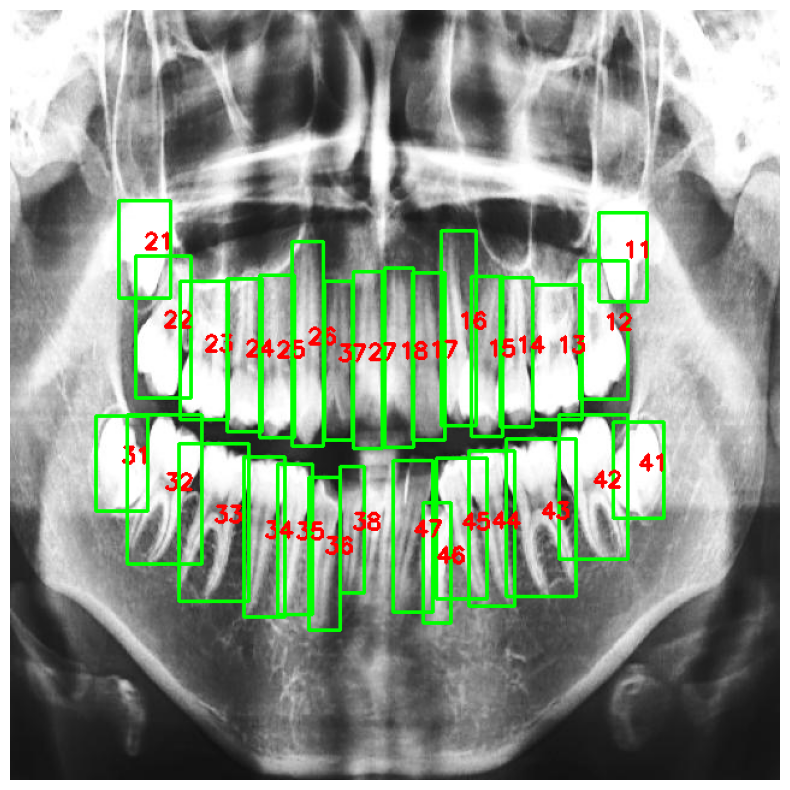

In [5]:
import os, random, cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# --- Load your trained YOLO model ---
model = YOLO("/content/runs/detect_fdi/weights/best.pt")

# --- Pick a random test image ---
test_folder = "/content/dataset_split/test/images"
img_path = os.path.join(test_folder, random.choice(os.listdir(test_folder)))

print("Using test image:", img_path)

# --- Run YOLO prediction ---
results = model.predict(img_path, imgsz=640, conf=0.5)[0]

# --- Extract bounding boxes and centers ---
teeth = []
for box in results.boxes.xyxy.cpu().numpy():
    x1, y1, x2, y2 = box
    cx, cy = (x1 + x2) / 2, (y1 + y2) / 2
    teeth.append((cx, cy, x1, y1, x2, y2))

# --- Post-processing: assign FDI numbers ---
if teeth:
    # Midline = median X of all detections
    mid_x = np.median([t[0] for t in teeth])
    # Mid Y = separates upper and lower arches
    mid_y = np.median([t[1] for t in teeth])

    quadrants = {"upper_right": [], "upper_left": [],
                 "lower_right": [], "lower_left": []}

    for (cx, cy, x1, y1, x2, y2) in teeth:
        if cy < mid_y:  # upper
            if cx < mid_x:
                quadrants["upper_left"].append((cx, cy, x1, y1, x2, y2))
            else:
                quadrants["upper_right"].append((cx, cy, x1, y1, x2, y2))
        else:  # lower
            if cx < mid_x:
                quadrants["lower_left"].append((cx, cy, x1, y1, x2, y2))
            else:
                quadrants["lower_right"].append((cx, cy, x1, y1, x2, y2))

    fdi_map = {}
    # Sort horizontally in each quadrant
    quadrants["upper_right"].sort(key=lambda t: t[0], reverse=True)  # 11–18
    quadrants["upper_left"].sort(key=lambda t: t[0])                  # 21–28
    quadrants["lower_left"].sort(key=lambda t: t[0])                  # 31–38
    quadrants["lower_right"].sort(key=lambda t: t[0], reverse=True)  # 41–48

    # Assign numbers
    for i, t in enumerate(quadrants["upper_right"], start=11):
        fdi_map[t] = str(i)
    for i, t in enumerate(quadrants["upper_left"], start=21):
        fdi_map[t] = str(i)
    for i, t in enumerate(quadrants["lower_left"], start=31):
        fdi_map[t] = str(i)
    for i, t in enumerate(quadrants["lower_right"], start=41):
        fdi_map[t] = str(i)

# --- Draw results ---
img = cv2.imread(img_path)
for (cx, cy, x1, y1, x2, y2), fdi in fdi_map.items():
    # Draw bounding box
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    # Put FDI number
    cv2.putText(img, fdi, (int(cx), int(cy)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


Using test image: /content/dataset_split/test/images/cate8-00303_jpg.rf.a3e701bff3c669333acfc92852546815.jpg

image 1/1 /content/dataset_split/test/images/cate8-00303_jpg.rf.a3e701bff3c669333acfc92852546815.jpg: 640x640 2 Canine (23)s, 1 Canine (33), 1 Canine (43), 1 Central Incisor (21), 1 Central Incisor (31), 1 Central Incisor (11), 1 First Molar (26), 1 First Molar (46), 1 First Premolar (34), 1 First Premolar (44), 2 First Premolar (24)s, 2 Lateral Incisor (22)s, 1 Lateral Incisor (32), 1 Lateral Incisor (42), 1 Second Molar (27), 1 Second Premolar (25), 1 Second Premolar (35), 1 Second Premolar (45), 1 Third Molar (18), 1 Third Molar (28), 15.3ms
Speed: 1.7ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Using test image: /content/dataset_split/test/images/6fb0e6ae-20240914-130826679.jpg

image 1/1 /content/dataset_split/test/images/6fb0e6ae-20240914-130826679.jpg: 640x640 1 Canine (13), 1 Canine (23), 2 Canine (33)s, 1 Central Incisor (21), 

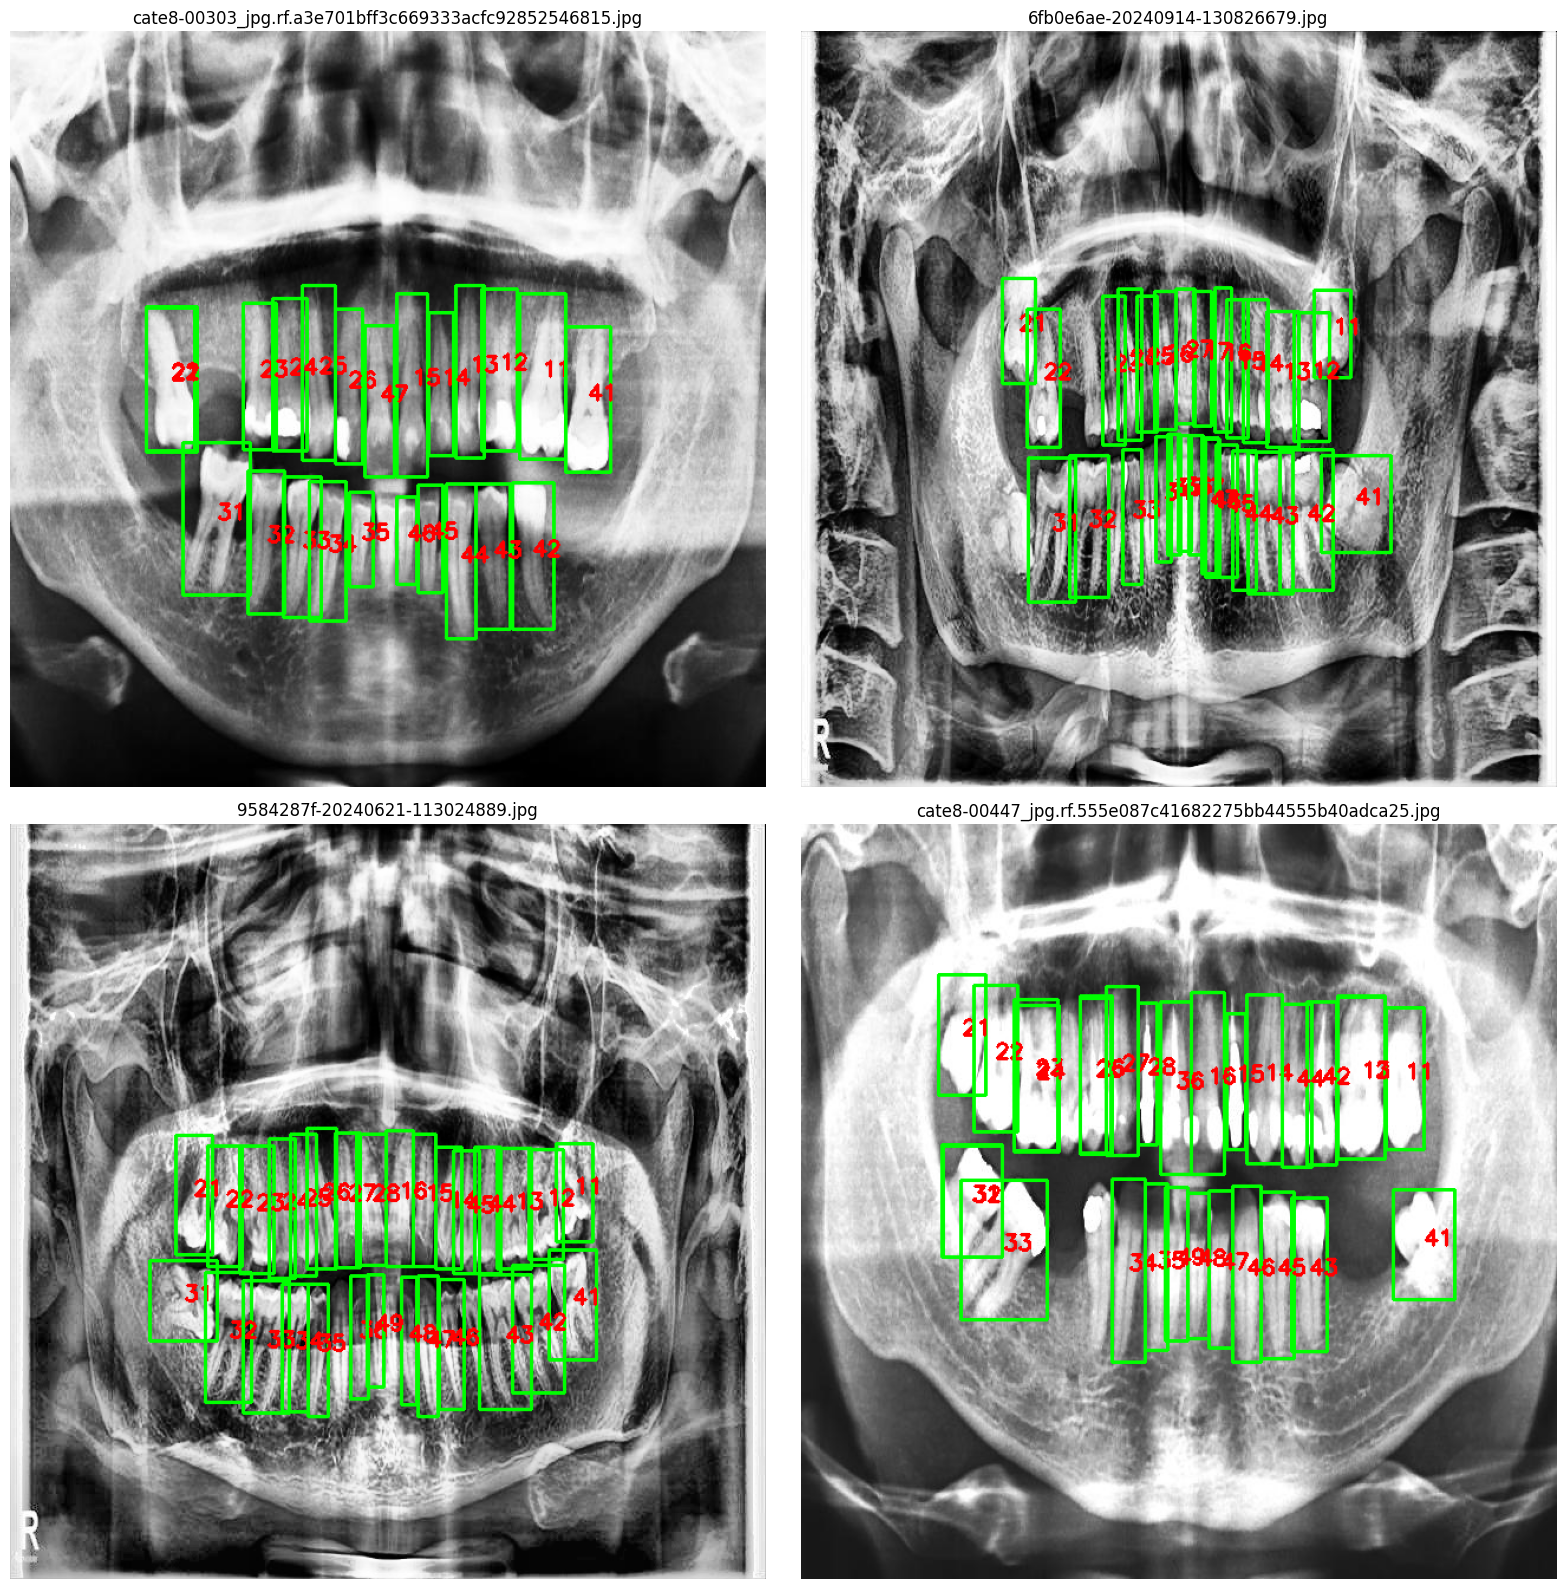

In [9]:
import os, random, cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# --- Load your trained YOLO model ---
model = YOLO("/content/runs/detect_fdi/weights/best.pt")

# --- Test folder ---
test_folder = "/content/dataset_split/test/images"

# --- Pick 4 random test images ---
test_images = random.sample(os.listdir(test_folder), 4)

plt.figure(figsize=(16, 16))

for idx, img_name in enumerate(test_images, start=1):
    img_path = os.path.join(test_folder, img_name)
    print("Using test image:", img_path)

    # --- Run YOLO prediction ---
    results = model.predict(img_path, imgsz=640, conf=0.5)[0]

    # --- Extract bounding boxes and centers ---
    teeth = []
    for box in results.boxes.xyxy.cpu().numpy():
        x1, y1, x2, y2 = box
        cx, cy = (x1 + x2) / 2, (y1 + y2) / 2
        teeth.append((cx, cy, x1, y1, x2, y2))

    # --- Post-processing: assign FDI numbers ---
    fdi_map = {}
    if teeth:
        mid_x = np.median([t[0] for t in teeth])
        mid_y = np.median([t[1] for t in teeth])

        quadrants = {"upper_right": [], "upper_left": [], "lower_right": [], "lower_left": []}
        for (cx, cy, x1, y1, x2, y2) in teeth:
            if cy < mid_y:
                if cx < mid_x:
                    quadrants["upper_left"].append((cx, cy, x1, y1, x2, y2))
                else:
                    quadrants["upper_right"].append((cx, cy, x1, y1, x2, y2))
            else:
                if cx < mid_x:
                    quadrants["lower_left"].append((cx, cy, x1, y1, x2, y2))
                else:
                    quadrants["lower_right"].append((cx, cy, x1, y1, x2, y2))

        quadrants["upper_right"].sort(key=lambda t: t[0], reverse=True)
        quadrants["upper_left"].sort(key=lambda t: t[0])
        quadrants["lower_left"].sort(key=lambda t: t[0])
        quadrants["lower_right"].sort(key=lambda t: t[0], reverse=True)

        for i, t in enumerate(quadrants["upper_right"], start=11):
            fdi_map[t] = str(i)
        for i, t in enumerate(quadrants["upper_left"], start=21):
            fdi_map[t] = str(i)
        for i, t in enumerate(quadrants["lower_left"], start=31):
            fdi_map[t] = str(i)
        for i, t in enumerate(quadrants["lower_right"], start=41):
            fdi_map[t] = str(i)

    # --- Draw results ---
    img = cv2.imread(img_path)
    for (cx, cy, x1, y1, x2, y2), fdi in fdi_map.items():
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(img, fdi, (int(cx), int(cy)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    # --- Plot in subplot ---
    plt.subplot(2, 2, idx)  # 2x2 grid for 4 images
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()
